In [16]:
import jax
# from jax.config import config
# config.update("jax_enable_x64", True)
import jax.numpy as jnp
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
%matplotlib inline

In [74]:
import optax

num_parameters = 100
X = jax.random.normal(jax.random.PRNGKey(0), (1000, num_parameters))
w_true = jax.random.normal(jax.random.PRNGKey(0), (num_parameters,))
y = X @ w_true + 1e-0 * jax.random.normal(jax.random.PRNGKey(0), (1,))

def f_(x, params):
    w = params["weight"]
    return x @ w

f = jax.vmap(f_, (0, None), 0)

# def loss(params, x, y):
#     y_hat = f(x, params)
#     diff = y - y_hat
#     return jnp.mean(jnp.square(diff))

def rosen_func(x):
    return jnp.sum((1 - x[:-1])**2 + 100* (x[1:] - x[:-1]**2)**2)

print(rosen_func(jnp.ones(100)))

grad_f = jax.grad(rosen_func, argnums=0)
# init_params = {"weight": jax.random.normal(jax.random.PRNGKey(10), (num_parameters,))}
lr = 1e-3
init_params = jax.random.uniform(jax.random.PRNGKey(10), (10, ))
sgd = optax.sgd(learning_rate=lr)
acc_sgd = optax.sgd(learning_rate=lr, momentum=0.9)
acc_nesterov_sgd = optax.sgd(learning_rate=lr, momentum=0.9, nesterov=True)
adam = optax.adam(learning_rate=lr)

batch_size = 20
num_epochs = 20

0.0


In [75]:
@jax.jit
def step(params, opt_state):
    loss_value, grads = jax.value_and_grad(rosen_func)(params)
    updates, opt_state = optimizer.update(grads, opt_state, params)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss_value

In [76]:
params = copy.deepcopy(init_params)
optimizer = acc_nesterov_sgd
opt_state = optimizer.init(params)
conv_acc_sgd_n = []
for i in range(1000):
    params, opt_state, loss_value = step(params, opt_state)
    conv_acc_sgd_n.append(loss_value)
    
    
    
print(params)

[8.9337277e-01 9.8105294e-01 7.6757389e-01 7.6990938e-01 5.4570764e-01
 3.2848862e-01 1.1711186e-01 2.4033075e-02 1.0472180e-02 1.0966904e-04]


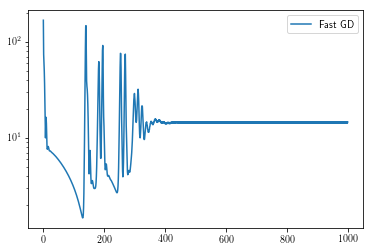

In [77]:
# plt.semilogy(conv_sgd, label="GD")
# plt.semilogy(conv_acc_sgd, label="Heavy ball")
plt.semilogy(conv_acc_sgd_n, label="Fast GD")

plt.legend()

In [13]:
def fit(params, optimizer, X, y, key, conv):
    opt_state = optimizer.init(params)
    
    @jax.jit
    def step(params, opt_state, batch, labels):
        loss_value, grads = jax.value_and_grad(loss)(params, batch, labels)
        updates, opt_state = optimizer.update(grads, opt_state, params)
        params = optax.apply_updates(params, updates)
        return params, opt_state, loss_value
    
    num_samples = X.shape[0]
    num_iter = num_samples // batch_size
    idxs = jax.random.permutation(key, num_samples)
    for i in range(num_iter):
        params, opt_state, loss_value = step(params, opt_state,
                                             X[idxs[batch_size*i:batch_size*(i+1)]],
                                             y[idxs[batch_size*i:batch_size*(i+1)]])
        conv.append(loss_value)

    return params

In [14]:
import copy
key = jax.random.PRNGKey(0)
params = copy.deepcopy(init_params)
conv = []
for k in range(num_epochs):
    key, subkey = jax.random.split(key)
    params =  fit(params, sgd, X, y, key, conv)

key = jax.random.PRNGKey(0)
params = copy.deepcopy(init_params)
conv_acc = []
for k in range(num_epochs):
    key, subkey = jax.random.split(key)
    params =  fit(params, acc_sgd, X, y, key, conv_acc)

key = jax.random.PRNGKey(0)
params = copy.deepcopy(init_params)
conv_acc_nesterov = []
for k in range(num_epochs):
    key, subkey = jax.random.split(key)
    params =  fit(params, acc_nesterov_sgd, X, y, key, conv_acc_nesterov)

key = jax.random.PRNGKey(0)
params = copy.deepcopy(init_params)
conv_adam = []
for k in range(num_epochs):
    key, subkey = jax.random.split(key)
    params =  fit(params, adam, X, y, key, conv_adam)

Text(0.5, 1.0, 'Batch size = 20, lr = 0.01')

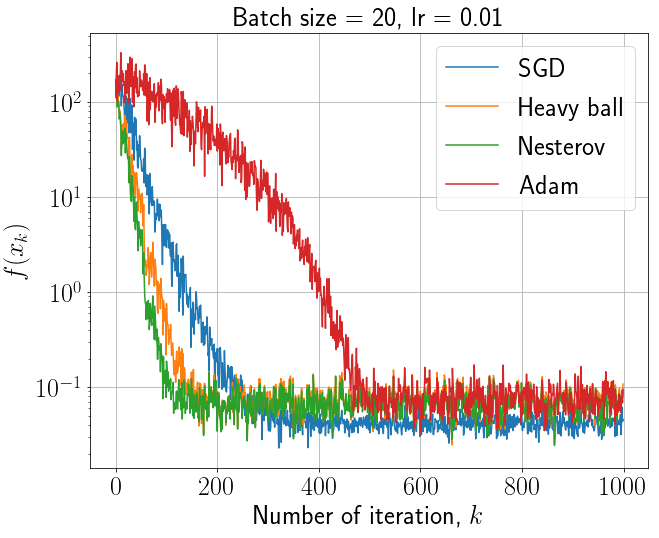

In [15]:
figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)

plt.semilogy(conv, label="SGD")
plt.semilogy(conv_acc, label="Heavy ball")
plt.semilogy(conv_acc_nesterov, label="Nesterov")
plt.semilogy(conv_adam, label="Adam")

plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$f(x_k)$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.grid(True)
plt.title("Batch size = {}, lr = {}".format(batch_size, lr), fontsize=fontsize)

In [213]:
batch_size = 2
num_epochs = 4

lr = 1e-3
sgd = optax.sgd(learning_rate=lr)
acc_sgd = optax.sgd(learning_rate=lr, momentum=0.9)
acc_nesterov_sgd = optax.sgd(learning_rate=lr, momentum=0.9, nesterov=True)
adam = optax.adam(learning_rate=lr)

key = jax.random.PRNGKey(0)
params = copy.deepcopy(init_params)
conv = []
for k in range(num_epochs):
    key, subkey = jax.random.split(key)
    params =  fit(params, sgd, X, y, key, conv)

key = jax.random.PRNGKey(0)
params = copy.deepcopy(init_params)
conv_acc = []
for k in range(num_epochs):
    key, subkey = jax.random.split(key)
    params =  fit(params, acc_sgd, X, y, key, conv_acc)

key = jax.random.PRNGKey(0)
params = copy.deepcopy(init_params)
conv_acc_nesterov = []
for k in range(num_epochs):
    key, subkey = jax.random.split(key)
    params =  fit(params, acc_nesterov_sgd, X, y, key, conv_acc_nesterov)

key = jax.random.PRNGKey(0)
params = copy.deepcopy(init_params)
conv_adam = []
for k in range(num_epochs):
    key, subkey = jax.random.split(key)
    params =  fit(params, adam, X, y, key, conv_adam)

Text(0.5, 1.0, 'Batch size = 2, lr = 0.001')

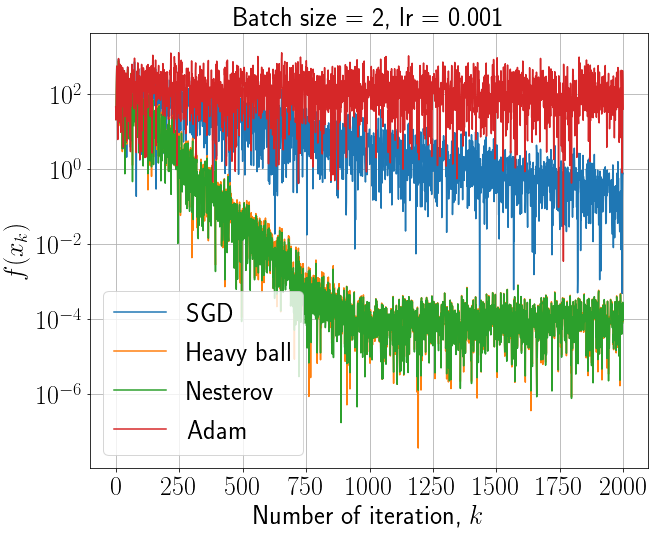

In [214]:
figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)

plt.semilogy(conv, label="SGD")
plt.semilogy(conv_acc, label="Heavy ball")
plt.semilogy(conv_acc_nesterov, label="Nesterov")
plt.semilogy(conv_adam, label="Adam")

plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$f(x_k)$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.grid(True)
plt.title("Batch size = {}, lr = {}".format(batch_size, lr), fontsize=fontsize)